# Technical preprocessing
In this notebook, we prepare the data in the format needed for training.
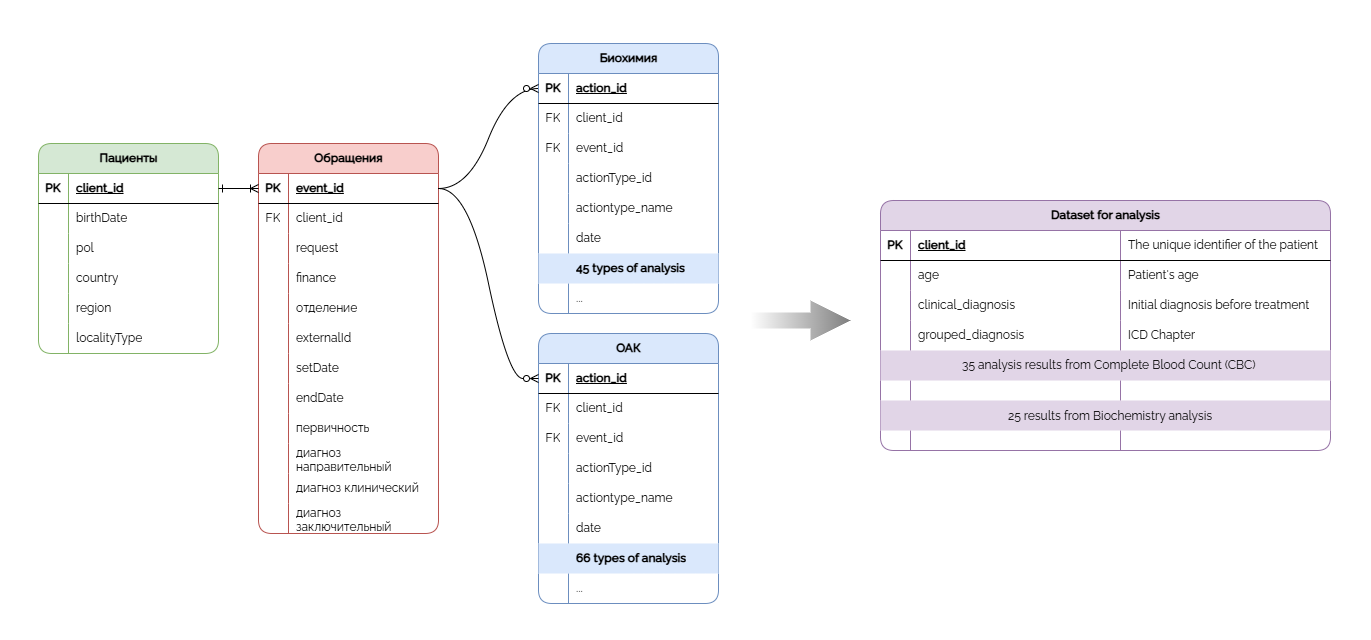

In [87]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)
from sklearn.preprocessing import OneHotEncoder

## Raw data

In [12]:
# Raw data
biochemistry = pd.read_excel('биохимияэ.xlsx')
oak = pd.read_excel('оакэ.xlsx')
visit = pd.read_excel('обращенияэ.xlsx')  
patients = pd.read_excel('пациентыэ.xlsx')  

In [14]:
biochemistry.head()

,client_id,event_id,action_id,actionType_id,actiontype_name,date,g ГТп[1.11.1.18],А/Г соотношение[БХК-8020],АЛТ[1.11.1.22],АСТ[1.11.1.21],...,Общий белок[ВЖ_ОБ],Общий билирубин[1.11.1.15],Панкреатическая амилаза[1.11.1.23],Прямой билирубин[1.11.1.17],Триглицериды[1.11.1.10],Хлор[1.11.1.30],Холестерин высокой плотности[1.11.1.9],Холестерин низкой плотности[1.11.1.8],Холестерин[1.11.1.7],Щелочная фосфатаза[1.11.1.19]
0,93,20371411,22673336,7315,Биохимическое исследование крови (ОМС),2021-02-08 11:00:00,NaN,1.1962864,59.6,48.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200
1,93,20452984,23316778,7315,Биохимическое исследование крови (ОМС),2021-09-16 11:00:00,NaN,1.183844,43.7,53.4,...,NaN,NaN,NaN,NaN,NaN,98.5,NaN,NaN,NaN,158
2,93,20649378,25884427,7315,Биохимическое исследование крови (ОМС),2023-11-08 10:00:00,NaN,1.1949368,48.6,52.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167
3,111,20480991,23579124,8848,Биохимическое исследование крови,2021-12-08 14:30:46,NaN,NaN,66,40,...,62.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111,20480991,23630831,8848,Биохимическое исследование крови,2021-12-22 17:05:09,NaN,NaN,NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
oak.head()

,client_id,event_id,action_id,actionType_id,actiontype_name,date,Анизоцитоз[ЛФ_Анизоцитоз],Атипичные мононуклеары[ЛФ_АтипМоно],Базофилы (%)[00029],Базофилы (%)[00030],...,Тромбоциты по Фонио[1.10.1.3],Тромбоциты[00015],Фракция крупных тромбоцитов[00016],Фракция незрелых ретикулоцитов (IRF)[00008],Ширина распределения тромбоцитов по объему[00017],Эозинофилы (%)[00027],Эозинофилы (%)[00028],Эозинофилы[00027],Эозинофилы[00028],Эритроциты[00002]
0,93,20371411,22673334,8450,Общий (клинический) анализ крови развернутый (...,2021-02-08 11:00:00,NaN,0.0,NaN,NaN,...,NaN,206,31.6,NaN,13.1,NaN,NaN,0.06,NaN,4.51
1,93,20452984,23316777,8450,Общий (клинический) анализ крови развернутый (...,2021-09-16 11:00:00,NaN,NaN,NaN,0.6,...,NaN,238,33,NaN,12.5,NaN,0.1,0.01,NaN,4.86
2,93,20649378,25884426,8450,Общий (клинический) анализ крови развернутый (...,2023-11-08 10:00:00,NaN,NaN,NaN,0.3,...,NaN,184,33.3,NaN,13.2,NaN,0.5,0.03,NaN,4.44
3,111,20480991,23579123,8850,Общий анализ крови,2021-12-08 14:30:46,NaN,NaN,NaN,NaN,...,NaN,10.6,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN
4,111,20480991,23630830,8850,Общий анализ крови,2021-12-22 17:05:09,NaN,NaN,NaN,NaN,...,NaN,135,NaN,NaN,NaN,NaN,NaN,0,0,3.58


In [18]:
visit.head()

,event_id,client_id,request,finance,отделение,externalId,setDate,endDate,первичность,диагноз направительный,диагноз клинический,диагноз заключительный
0,3528311,166697,Поликлиника,ОМС,NaN,Амб.,43109.000000,43109.879479,повторный,NaN,NaN,NaN
1,3526331,164649,Круглосуточный стационар,ВМП,НКО ХТГЗ,3,43102.379167,43112.458333,повторный,NaN,C90.0,C90.0
2,3526344,166606,Круглосуточный стационар,ВМП,НКО ХТГЗ,6,43102.000000,43129.625544,повторный,NaN,NaN,C91.0
3,3526391,137833,Круглосуточный стационар,ВМП-ОМС,НКО ХГ,9,43102.000000,43109.666875,повторный,NaN,NaN,C82
4,3526852,166405,Круглосуточный стационар,ВМП,НКО ХГ,18,43103.449306,43172.583333,первичный,NaN,NaN,C85.7


In [20]:
patients.head()

,client_id,birthDate,pol,country,region,localityType
0,166697,1966-05-21,Ж,Россия,Башкортостан Республика,Город
1,164649,1948-01-12,Ж,Россия,Коми Республика,Город
2,105098,1954-10-31,М,Россия,Москва Город,Город
3,137833,1966-02-19,Ж,Россия,Москва Город,Город
4,143467,1995-07-30,Ж,Россия,Москва Город,Город


## Assembling the table

### Metadata (patient ID, age, diagnosis, grouping of diseases)

In [30]:
# 1. Find the first biochemistry test dates for each patient
first_biochem = (
    biochemistry
    .sort_values(['client_id', 'date'])
    .drop_duplicates('client_id', keep='first')[['client_id', 'date']]
    .rename(columns={'date': 'first_biochem_date'})
)

# 2. Find the first complete blood count (CBC) dates for each patient
first_oak = (
    oak
    .sort_values(['client_id', 'date'])
    .drop_duplicates('client_id', keep='first')[['client_id', 'date']]
    .rename(columns={'date': 'first_oak_date'})
)

# 3. Get the first non-NaN clinical diagnosis for each patient
visit['setDate'] = pd.to_datetime(visit['setDate'])
first_diagnosis = (
    visit[visit['диагноз клинический'].notna()]
    .sort_values(['client_id', 'setDate'])
    .drop_duplicates('client_id', keep='first')[['client_id', 'диагноз клинический']]
)

# 4. Define diagnosis groups by ICD codes (first characters)
diagnosis_codes = [
    'D69', 'D47', 'C92', 'C91', 'C90', 'C83', 'D46', 'D50', 
    'D70', 'D75', 'C81', 'C85', 'C82', 'D45', 'D59', 'D72', 'D61'
]

def group_diagnosis(diagnosis):
    """Group diagnosis by predefined ICD code list."""
    if pd.isna(diagnosis):
        return None
    for code in diagnosis_codes:
        if str(diagnosis).startswith(code):
            return code
    return 'other'

first_diagnosis['grouped_diagnosis'] = first_diagnosis['диагноз клинический'].apply(group_diagnosis)

# 5. Create main patient table with demographic data
result_table = patients[['client_id', 'pol', 'birthDate']].copy()
result_table['birthDate'] = pd.to_datetime(result_table['birthDate'])

# 6. Merge first test dates into the main table
result_table = (
    result_table
    .merge(first_biochem, on='client_id', how='left')
    .merge(first_oak, on='client_id', how='left')
)

# 7. Merge diagnosis info into the main table
result_table = result_table.merge(first_diagnosis, on='client_id', how='left')

# 8. Calculate patient age at the date of the first available test
result_table['first_analysis_date'] = result_table[['first_biochem_date', 'first_oak_date']].min(axis=1)
result_table['age'] = (result_table['first_analysis_date'] - result_table['birthDate']).dt.days // 365

# 9. Extract day-only versions of test dates to compare them
result_table['biochem_date_only'] = result_table['first_biochem_date'].dt.date
result_table['oak_date_only'] = result_table['first_oak_date'].dt.date

# 10. Find patients with different test dates for biochemistry and CBC
different_days = result_table[
    (result_table['biochem_date_only'] != result_table['oak_date_only']) &
    result_table['first_biochem_date'].notna() &
    result_table['first_oak_date'].notna()
]

different_days['days_difference'] = (
    different_days['first_oak_date'] - different_days['first_biochem_date']
).dt.days

# 11. Create final table with key patient info
final_table = result_table[[
    'client_id', 'pol', 'age',
    'диагноз клинический', 'grouped_diagnosis'
]]

In [34]:
final_table.head()

,client_id,pol,age,диагноз клинический,grouped_diagnosis
0,166697,Ж,51.0,C90.0,C90
1,164649,Ж,70.0,C90.0,C90
2,105098,М,63.0,C90.0,C90
3,137833,Ж,51.0,C82,C82
4,143467,Ж,22.0,C92.7,C92


In [44]:
print("Diagnosis distribution:")
print(final_table['grouped_diagnosis'].value_counts(dropna=False))

Diagnosis distribution:
grouped_diagnosis
other    13053
NaN       6847
D47       2461
D69       2144
C91       1825
C92       1711
C90       1615
C83       1224
D50       1040
D46       1004
D75        918
C81        810
C85        659
D45        618
C82        579
D72        532
D59        472
D61        431
D70         98
Name: count, dtype: int64


### Assembly of CBC and biochemical analyses

In the raw data, there are several records with different dates for a single patient. Therefore, there can be both tests during the illness and after treatment. For correct diagnosis, we choose data only after the first visit to the clinic (patient is admitted with a disease). The following shows the number of patients who had different dates for the first general blood count (CBC) and biochemical tests. So, our goal is to take the data from the initial doctor's visit:
- Both tests if they were performed on the same day.
- CBC/Biochemistry only, if the difference in dates between the tests is more than one day.

In [52]:
print(f"Number of patients with different test dates: {len(different_days)}")

Number of patients with different test dates: 3554


In [54]:
# Ensure 'date' columns are in datetime format
oak['date'] = pd.to_datetime(oak['date'])
biochemistry['date'] = pd.to_datetime(biochemistry['date'])

# 1. Get the first (earliest) CBC row for each patient (one visit only)
first_oak = (
    oak.sort_values('date')
       .groupby('client_id')
       .agg(lambda x: x.iloc[0])  # take the entire first row
       .reset_index()
)

# 2. Get the first (earliest) biochemistry row for each patient
first_biochem = (
    biochemistry.sort_values('date')
                .groupby('client_id')
                .agg(lambda x: x.iloc[0])
                .reset_index()
)

# 3. Rename date columns
first_oak = first_oak.rename(columns={'date': 'date_oak'})
first_biochem = first_biochem.rename(columns={'date': 'date_biochem'})

# 4. Merge both datasets on client_id
merged = pd.merge(first_oak, first_biochem, on='client_id', how='outer')

# 5. Define columns to exclude from feature lists
cols_to_exclude = [
    'event_id', 'action_id', 'actionType_id', 'actiontype_name',
    'date_oak', 'date_biochem'
]

oak_cols = [col for col in first_oak.columns if col not in ['client_id'] + cols_to_exclude]
biochem_cols = [col for col in first_biochem.columns if col not in ['client_id'] + cols_to_exclude]

# 6. Function to combine data for each patient
def combine_row(row):
    result = {'client_id': row['client_id']}
    
    # Initialize all features as None
    for col in oak_cols + biochem_cols:
        result[col] = None

    has_oak = pd.notna(row.get('date_oak'))
    has_biochem = pd.notna(row.get('date_biochem'))

    if has_oak and has_biochem:
        # Calculate the difference in days between CBC and biochemistry dates
        delta = abs((row['date_oak'] - row['date_biochem']).days)
        
        if delta <= 1:
            # If tests are on the same or adjacent days, take both
            for col in oak_cols:
                if col in row.index:
                    result[col] = row[col]
            for col in biochem_cols:
                if col in row.index:
                    result[col] = row[col]
        else:
            # Otherwise, take only the earlier visit
            if row['date_oak'] < row['date_biochem']:
                for col in oak_cols:
                    if col in row.index:
                        result[col] = row[col]
            else:
                for col in biochem_cols:
                    if col in row.index:
                        result[col] = row[col]
    elif has_oak:
        # If only CBC is available
        for col in oak_cols:
            if col in row.index:
                result[col] = row[col]
    elif has_biochem:
        # If only biochemistry is available
        for col in biochem_cols:
            if col in row.index:
                result[col] = row[col]
    
    return result

# 7. Apply the function to merge rows
result = pd.DataFrame([combine_row(row) for _, row in merged.iterrows()])

# 8. Reorder columns: client_id first, then CBC columns, then biochemistry columns
final_cols = ['client_id'] + oak_cols + biochem_cols
result = result[final_cols]

In [56]:
result.head()

,client_id,Анизоцитоз[ЛФ_Анизоцитоз],Атипичные мононуклеары[ЛФ_АтипМоно],Базофилы (%)[00029],Базофилы (%)[00030],Базофилы[00029],Базофилы[00030],Гематокрит[00003],Гемоглобин[00001],Количество незрелых гранулоцитов[00036],...,Общий белок[ВЖ_ОБ],Общий билирубин[1.11.1.15],Панкреатическая амилаза[1.11.1.23],Прямой билирубин[1.11.1.17],Триглицериды[1.11.1.10],Хлор[1.11.1.30],Холестерин высокой плотности[1.11.1.9],Холестерин низкой плотности[1.11.1.8],Холестерин[1.11.1.7],Щелочная фосфатаза[1.11.1.19]
0,93,NaN,0.0,NaN,NaN,0.02,NaN,0.41,137.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200
1,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,...,62.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,195,NaN,NaN,NaN,NaN,NaN,NaN,0.403,142.0,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,None
3,369,NaN,NaN,NaN,0.6,0.03,NaN,0.364,126.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.79,NaN
4,479,NaN,NaN,NaN,NaN,NaN,NaN,0.42,142.0,NaN,...,NaN,NaN,16.5,NaN,NaN,NaN,NaN,NaN,NaN,64.1


### Merge and OneHotEncoder of categorical values

In [59]:
# Manually delete line where Anisocytosis is 26, an outlier (a categorical feature, not a numerical one)
result = result[result['Анизоцитоз[ЛФ_Анизоцитоз]'] != '26']
final_table = final_table[final_table['client_id'] != 289431]

In [61]:
result['Анизоцитоз[ЛФ_Анизоцитоз]'].value_counts()

Анизоцитоз[ЛФ_Анизоцитоз]
+      5641
++     1289
+++     132
-        14
Name: count, dtype: int64

In [63]:
final_table[final_table['client_id'] == 289431]

,client_id,pol,age,диагноз клинический,grouped_diagnosis


In [66]:
# Left joint: save all rows from final_table, add analyses if available
merged_table = pd.merge(
    final_table,
    result,
    on='client_id',
    how='left'
)

In [70]:
# OneHotEncoder of categorical values
merged_table_encoded = merged_table.copy()

# 1. Process the gender column separately
if 'pol' in merged_table_encoded.columns:
    # Convert gender to binary: 1 - Male, 0 - Female
    merged_table_encoded['gender'] = merged_table_encoded['pol'].apply(
        lambda x: 1 if str(x).upper() in ['M', 'М', 'MALE', 'МУЖ'] else 0
    )
    # Remove the original column
    merged_table_encoded = merged_table_encoded.drop(columns=['pol'])

# 2. Process other categorical variables
cols_to_encode = [
    'Анизоцитоз[ЛФ_Анизоцитоз]',
    'Пойкилоцитоз[ЛФ_Пойкилоцитоз]'
]

# Keep only the columns that exist in the dataset
cols_to_encode = [col for col in cols_to_encode if col in merged_table_encoded.columns]

if len(cols_to_encode) > 0:
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(
        drop='if_binary',
        sparse_output=False,
        handle_unknown='ignore',
        dtype=int
    )
    
    # Apply OneHotEncoder to the selected columns
    encoded_data = encoder.fit_transform(merged_table_encoded[cols_to_encode])
    
    # Create a DataFrame with encoded features
    encoded_df = pd.DataFrame(
        encoded_data,
        columns=encoder.get_feature_names_out(cols_to_encode),
        index=merged_table_encoded.index
    )
    
    # Concatenate encoded features to the main table
    merged_table_encoded = pd.concat([merged_table_encoded, encoded_df], axis=1)
    
    # Drop original categorical columns
    merged_table_encoded = merged_table_encoded.drop(columns=cols_to_encode)

In [72]:
merged_table_encoded.head()

,client_id,age,диагноз клинический,grouped_diagnosis,Атипичные мононуклеары[ЛФ_АтипМоно],Базофилы (%)[00029],Базофилы (%)[00030],Базофилы[00029],Базофилы[00030],Гематокрит[00003],...,Анизоцитоз[ЛФ_Анизоцитоз]_++,Анизоцитоз[ЛФ_Анизоцитоз]_+++,Анизоцитоз[ЛФ_Анизоцитоз]_-,Анизоцитоз[ЛФ_Анизоцитоз]_None,Анизоцитоз[ЛФ_Анизоцитоз]_nan,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_++,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+++,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_None,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_nan
0,166697,51.0,C90.0,C90,NaN,NaN,NaN,NaN,NaN,0.28,...,0,0,0,0,1,0,0,0,0,1
1,164649,70.0,C90.0,C90,NaN,NaN,NaN,NaN,NaN,0.40,...,0,0,0,0,1,0,0,0,0,1
2,105098,63.0,C90.0,C90,NaN,NaN,NaN,NaN,NaN,0.25,...,0,0,0,0,1,0,0,0,0,1
3,137833,51.0,C82,C82,NaN,None,None,None,None,None,...,0,0,0,1,0,0,0,0,1,0
4,143467,22.0,C92.7,C92,NaN,NaN,NaN,NaN,NaN,0.40,...,0,0,0,0,1,0,0,0,0,1


In [74]:
# Finally, we will remove the columns with nan/NaN after OneHotEncoder
columns_to_drop = [
    'Анизоцитоз[ЛФ_Анизоцитоз]_None',
    'Анизоцитоз[ЛФ_Анизоцитоз]_nan',
    'Пойкилоцитоз[ЛФ_Пойкилоцитоз]_None',
    'Пойкилоцитоз[ЛФ_Пойкилоцитоз]_nan'
]

df = merged_table_encoded.drop(columns=columns_to_drop)

In [76]:
df

,client_id,age,диагноз клинический,grouped_diagnosis,Атипичные мононуклеары[ЛФ_АтипМоно],Базофилы (%)[00029],Базофилы (%)[00030],Базофилы[00029],Базофилы[00030],Гематокрит[00003],...,Холестерин[1.11.1.7],Щелочная фосфатаза[1.11.1.19],gender,Анизоцитоз[ЛФ_Анизоцитоз]_+,Анизоцитоз[ЛФ_Анизоцитоз]_++,Анизоцитоз[ЛФ_Анизоцитоз]_+++,Анизоцитоз[ЛФ_Анизоцитоз]_-,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_++,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+++
0,166697,51.0,C90.0,C90,NaN,NaN,NaN,NaN,NaN,0.28,...,6.89,110.5,0,0,0,0,0,0,0,0
1,164649,70.0,C90.0,C90,NaN,NaN,NaN,NaN,NaN,0.40,...,NaN,56 Е/л,0,0,0,0,0,0,0,0
2,105098,63.0,C90.0,C90,NaN,NaN,NaN,NaN,NaN,0.25,...,4.3 ммоль/л,58 Е/л,1,0,0,0,0,0,0,0
3,137833,51.0,C82,C82,NaN,None,None,None,None,None,...,4.7 ммоль/л,80 Е/л,0,0,0,0,0,0,0,0
4,143467,22.0,C92.7,C92,NaN,NaN,NaN,NaN,NaN,0.40,...,NaN,119 Е/л,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38035,452774,38.0,C90,C90,NaN,NaN,0.5,0.03,NaN,0.48,...,6.86,63,1,0,0,0,0,0,0,0
38036,215843,68.0,D47.4,D47,0.0,NaN,NaN,0.21,NaN,0.34,...,NaN,83,0,0,1,0,0,0,0,0
38037,388262,55.0,D47.4,D47,0.0,NaN,NaN,0,NaN,0.61,...,5.05,NaN,0,0,0,0,0,0,0,0
38038,453859,44.0,C91.8,C91,0.0,NaN,NaN,0.75,NaN,0.19,...,3.95,321.8,1,0,0,0,0,0,0,0


## Data cleaning
### Different typos
There was a lot of "garbage" in the source data, such as:
- different formats for writing None values (NaN, nan, '-')
- signatures of the dimension of the values in the cells ('95.00 фл', '2.00 10в9', '14.3 мкмоль/л')
- random typos ('--', '---.-', '-.---', '379..3')


In [89]:
# single NaN type
df = df.replace(['None', 'none', 'NONE', 'NaN', 'nan', 'N/A', 'n/a', '', ' ', '-', '--', '---.-', '-.---'], np.nan)
# manualy changed '379..3'

### NaN diagnoses deleting

In [106]:
df = df[df["диагноз клинический"].notna()]
df

,client_id,age,диагноз клинический,grouped_diagnosis,Атипичные мононуклеары[ЛФ_АтипМоно],Базофилы (%)[00030],Базофилы[00029],Базофилы[00030],Гематокрит[00003],Гемоглобин[00001],...,Холестерин[1.11.1.7],Щелочная фосфатаза[1.11.1.19],gender,Анизоцитоз[ЛФ_Анизоцитоз]_+,Анизоцитоз[ЛФ_Анизоцитоз]_++,Анизоцитоз[ЛФ_Анизоцитоз]_+++,Анизоцитоз[ЛФ_Анизоцитоз]_-,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_++,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+++
0,166697,51.0,C90.0,C90,NaN,NaN,NaN,NaN,0.28,92.0,...,6.89,110.5,0,0,0,0,0,0,0,0
1,164649,70.0,C90.0,C90,NaN,NaN,NaN,NaN,0.40,NaN,...,NaN,56 Е/л,0,0,0,0,0,0,0,0
2,105098,63.0,C90.0,C90,NaN,NaN,NaN,NaN,0.25,NaN,...,4.3 ммоль/л,58 Е/л,1,0,0,0,0,0,0,0
3,137833,51.0,C82,C82,NaN,None,None,None,None,NaN,...,4.7 ммоль/л,80 Е/л,0,0,0,0,0,0,0,0
4,143467,22.0,C92.7,C92,NaN,NaN,NaN,NaN,0.40,NaN,...,NaN,119 Е/л,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38035,452774,38.0,C90,C90,NaN,0.5,0.03,NaN,0.48,164.0,...,6.86,63,1,0,0,0,0,0,0,0
38036,215843,68.0,D47.4,D47,0.0,NaN,0.21,NaN,0.34,108.0,...,NaN,83,0,0,1,0,0,0,0,0
38037,388262,55.0,D47.4,D47,0.0,NaN,0,NaN,0.61,188.0,...,5.05,NaN,0,0,0,0,0,0,0,0
38038,453859,44.0,C91.8,C91,0.0,NaN,0.75,NaN,0.19,69.0,...,3.95,321.8,1,0,0,0,0,0,0,0


### Double columns
A special challenge was the presence of double columns. They have similar but not identical names, but they contain the results of the same analysis for different patients. For example:
- 'Hb в эр-те[00011]' VS 'Среднее содержание гемоглобина в эритроците[00011]'
- 'Базофилы (%)[00029]' VS 'Базофилы[00029]'

In this notebook, we will show only one example of processing such columns:

In [94]:
print(list(df.columns))

['client_id', 'age', 'диагноз клинический', 'grouped_diagnosis', 'Атипичные мононуклеары[ЛФ_АтипМоно]', 'Базофилы (%)[00029]', 'Базофилы (%)[00030]', 'Базофилы[00029]', 'Базофилы[00030]', 'Гематокрит[00003]', 'Гемоглобин[00001]', 'Количество незрелых гранулоцитов[00036]', 'Контрольная сумма[ЛФ_Контрольный]', 'Лейкоциты[00010]', 'Лимфoциты[ЛФ_Лимфоциты]', 'Лимфобласты[ЛФ_Лимфобласты]', 'Лимфоциты (%)[00023]', 'Лимфоциты[00023]', 'Лимфоциты[00024]', 'Лимфоциты[ЛФ_Лимфоциты]', 'Метамиелоциты, (б)[ЛФ_Метамиелоц_б]', 'Метамиелоциты, (н)[ЛФ_Метамиелоц_н]', 'Метамиелоциты, (э)[ЛФ_Метамиелоц_э]', 'Миелоциты, (б)[ЛФ_Миелоциты_б]', 'Миелоциты, (н)[ЛФ_Миелоциты_н]', 'Миелоциты, (э)[ЛФ_Миелоциты_э]', 'Монoциты[ЛФ_Моноциты]', 'Моноциты (%)[00026]', 'Моноциты[00025]', 'Моноциты[ЛФ_Моноциты]', 'Недифференцированные бласты[ЛФ_Бласты]', 'Нейтрофилы (%)[00021]', 'Нейтрофилы[00021]', 'Нейтрофилы[00022]', 'Нормобласты, 100 WBC[ЛФ_Нормобл]', 'Палочкоядерные, (б)[ЛФ_Палочкоядер_б]', 'Палочкоядерные, (н)[ЛФ_

In [96]:
col_percent = 'Базофилы (%)[00029]'
col_abs = 'Базофилы[00029]'

# 1) Check if there are rows where both columns are not NaN (dependent)
mask_both_filled = df[col_percent].notna() & df[col_abs].notna()

if mask_both_filled.any():
    print(f"Found {mask_both_filled.sum()} rows where both columns are filled")
    display(df.loc[mask_both_filled, [col_percent, col_abs]])
else:
    print("No rows where both columns are filled")


No rows where both columns are filled


In [98]:
# 2) Merge values into a single column
# Take values from col_abs, and if NaN — fill from col_percent
df[col_abs] = df[col_abs].combine_first(df[col_percent])

# Remove the old percentage column
df = df.drop(columns=[col_percent])


## Feature selection
After the basic step of clearing the data, we have a table that can be used for training. However, it turned out to be more than 100 columns. Based on the presentation of the data and recommendations for interpretation from the doctor, we selected 60 analyses for further training of the model.

For more information, see the **EDA Jupiter Notebook in the repository**.
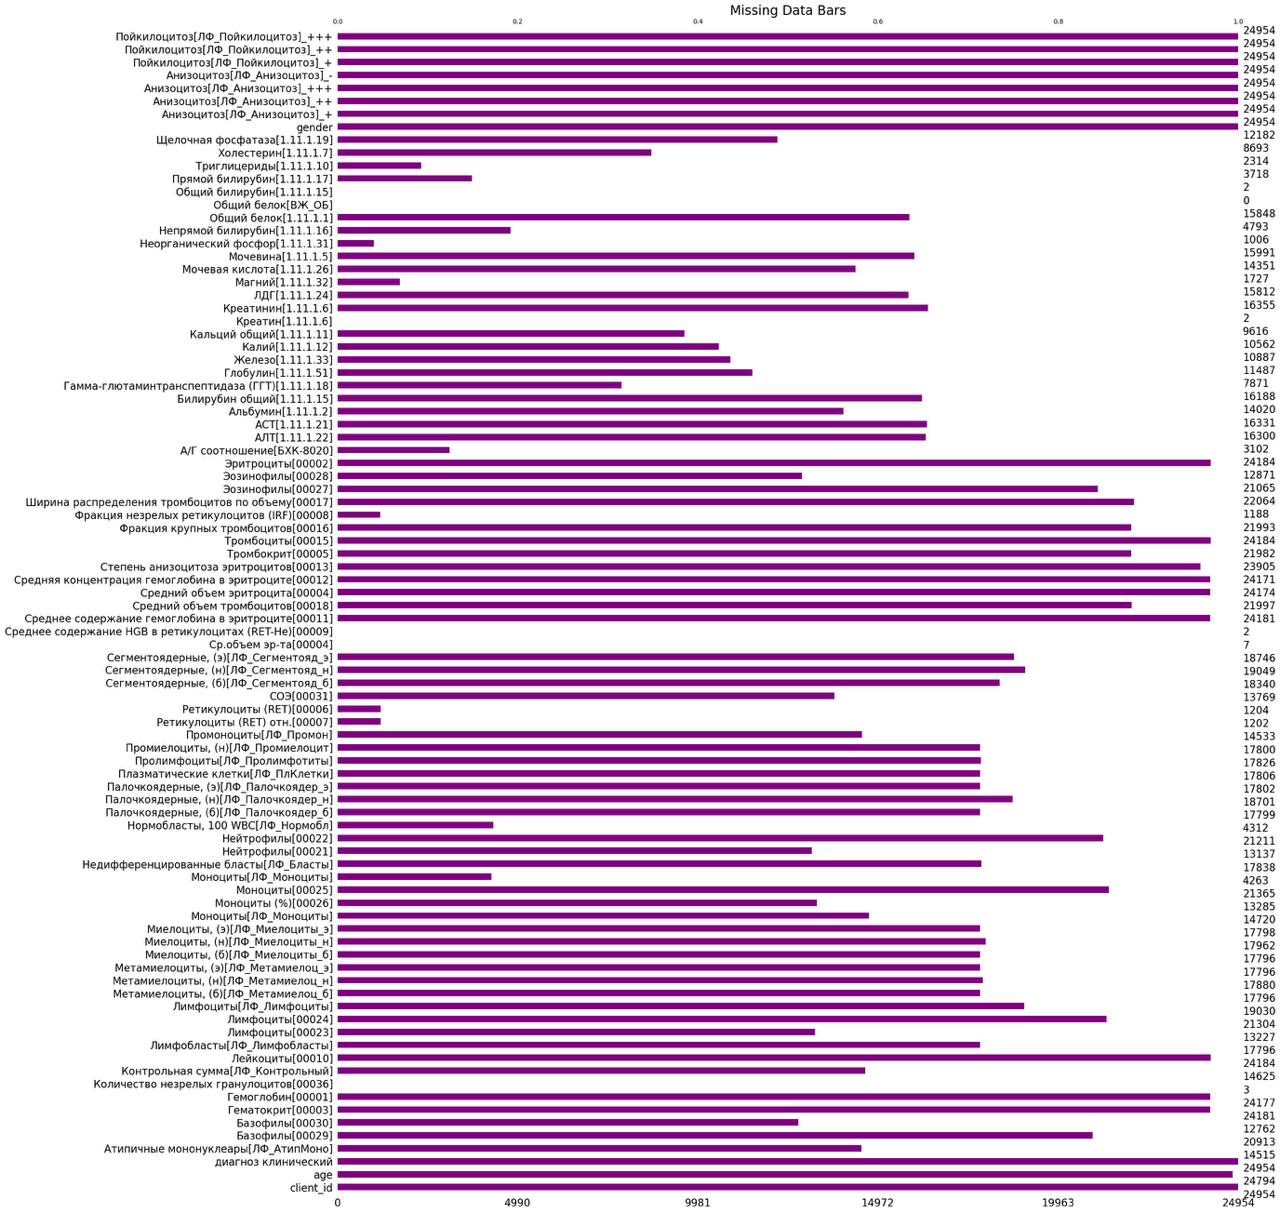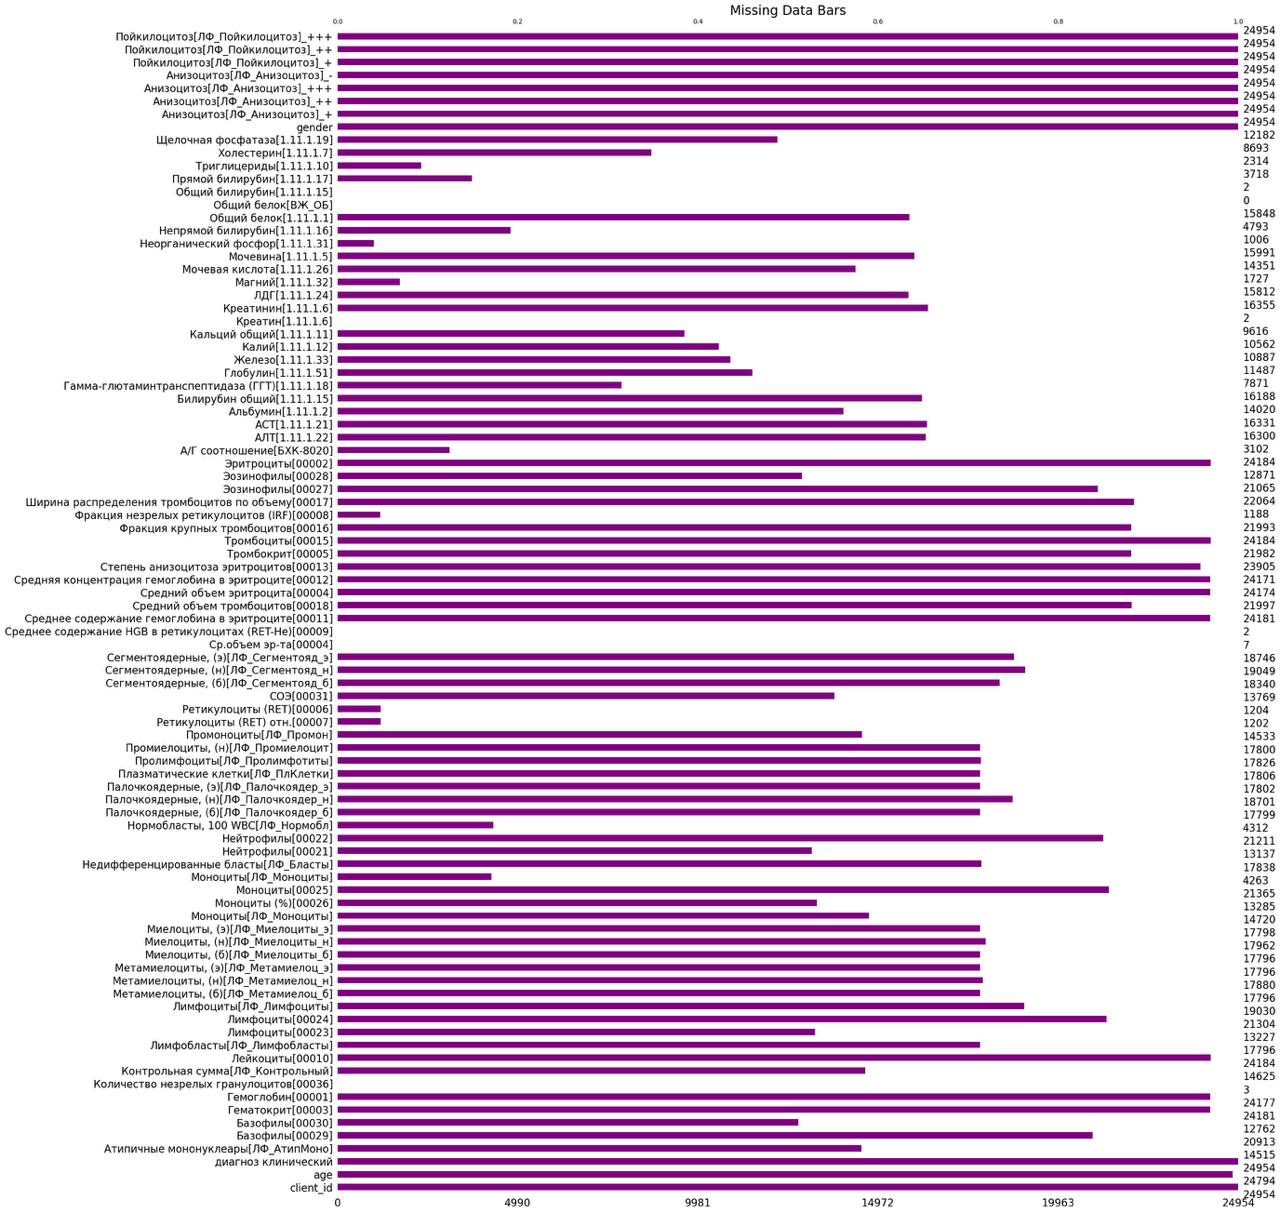

## Disease selection
For the best prediction of the model, it was necessary to reduce the number of diagnoses to the most well-predicted set. This was done based on the presentation of diagnoses (number of patients) and the recommendations of the doctor (team member) on the selection of various laboratory parameters.

In [116]:
# top 50 were selected on the presentation of diagnoses (number of patients)
top_50 = [
    "D68.8", "C90.0", "D47.1", "D68.9", "D66", "D69.6", "C92.1", "C83.3",
    "C91.1", "C92.0", "D45", "D69.5", "Z52.3", "D69.3", "C91.0", "C81.1",
    "C91.4", "D46.9", "D50", "D47.4", "D47.3", "D61.3", "I89.8", "D50.9",
    "C85.7", "D68.0", "D75.9", "E75.2", "D64.9", "D72", "D72.9", "C82.0",
    "D68.5", "C81", "D75", "C92.4", "C83.0", "I70.8", "D50.8", "C82",
    "D59.1", "D75.1", "C85.9", "D47.2", "C88.0", "D75.2", "D46.7", "M16.1",
    "D56.1", "C90"
]

In [118]:
# top 23 were selected on prediction results in futher Jupiter Notebook
top_23 = [
    'C91.4', 'D61.3', 'D50.9', 'C91.0', 'D75.1', 'C90.0',
    'D47.1', 'D69.6', 'C92.1', 'C91.1', 'D56.1', 'C92.0',
    'D56.1', 'D64.9', 'C82', 'D66', 'D68.8', 'C92.4',
    'C81.1', 'D61.3', 'D59.1', 'D56.1', 'D50'
]

# Healthy selection
We faced a big challenge - the lack of a healthy sample. However, there are examples in the data with a clinical diagnosis of 'Z52.3' that belong to the bone marrow donor database, which means they must be healthy. For greater confidence, the clinician checked the tests of these patients and selected the results of 95 **healthy patients**.

In [123]:
df = pd.read_excel('version_super_small.xlsx')

In [127]:
healthy_ids = [
    229587, 237034, 241997, 243926, 242754, 211294, 216166, 245354, 258025, 255985,
    261339, 269990, 265532, 277918, 278661, 270809, 279166, 269692, 279512, 280485,
    280610, 281547, 288898, 134214, 301400, 303354, 304310, 308401, 308083, 309101,
    307756, 318198, 311189, 296363, 320803, 314111, 323968, 242220, 308794, 304782,
    313910, 325767, 322252, 331588, 333340, 334443, 326335, 338041, 342437, 342804,
    325225, 349751, 326557, 332925, 354575, 355113, 358125, 361198, 334487, 365967,
    368715, 373550, 375731, 376789, 377801, 371739, 368359, 381019, 381345, 386060,
    376044, 303101, 393654, 365467, 404472, 405474, 406922, 418462, 421109, 415266,
    422820, 418169, 388039, 428789, 430194, 431723, 418119, 435433, 428056, 394158,
    404949, 440485, 444014, 422111, 437482
]

coll_full = top_50

df_copy = df.copy()

# Ставим "healthy" для указанных client_id
df_copy.loc[df_copy["client_id"].isin(healthy_ids), "диагноз клинический"] = "healthy"
df_copy.loc[df_copy["client_id"].isin(healthy_ids), "grouped_diagnosis"] = "healthy"
# Для всех остальных диагнозов, которые не в coll_full и не healthy → other
mask_not_coll = ~df_copy["диагноз клинический"].isin(coll_full + ["healthy"])
df_copy.loc[mask_not_coll, "диагноз клинический"] = "other"

df_result = df_copy.copy()

In [129]:
df_result

,client_id,age,диагноз клинический,grouped_diagnosis,Базофилы[00029],Базофилы[00030],Гематокрит[00003],Гемоглобин[00001],Лейкоциты[00010],Лимфобласты[ЛФ_Лимфобласты],...,Общий белок[1.11.1.1],Холестерин[1.11.1.7],gender,Анизоцитоз[ЛФ_Анизоцитоз]_+,Анизоцитоз[ЛФ_Анизоцитоз]_++,Анизоцитоз[ЛФ_Анизоцитоз]_+++,Анизоцитоз[ЛФ_Анизоцитоз]_-,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_++,Пойкилоцитоз[ЛФ_Пойкилоцитоз]_+++
0,166697,51.0,C90.0,C90,NaN,NaN,0.28,92.0,7.00,NaN,...,66.6,6.89,0,0,0,0,0,0,0,0
1,164649,70.0,C90.0,C90,NaN,NaN,0.40,NaN,3.80,NaN,...,68.7,NaN,0,0,0,0,0,0,0,0
2,105098,63.0,C90.0,C90,NaN,NaN,0.25,NaN,2.00,NaN,...,60.6,4.30,1,0,0,0,0,0,0,0
3,137833,51.0,C82,C82,NaN,NaN,NaN,NaN,NaN,NaN,...,66.4,4.70,0,0,0,0,0,0,0,0
4,143467,22.0,other,C92,NaN,NaN,0.40,NaN,9.80,NaN,...,68.3,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31188,452774,38.0,C90,C90,0.03,0.5,0.48,164.0,5.77,NaN,...,83.2,6.86,1,0,0,0,0,0,0,0
31189,215843,68.0,D47.4,D47,0.21,NaN,0.34,108.0,10.54,0.0,...,71.1,NaN,0,0,1,0,0,0,0,0
31190,388262,55.0,D47.4,D47,0.00,NaN,0.61,188.0,11.22,0.0,...,77.0,5.05,0,0,0,0,0,0,0,0
31191,453859,44.0,other,C91,0.75,NaN,0.19,69.0,18.77,0.0,...,59.6,3.95,1,0,0,0,0,0,0,0


Finally, we have prepared a table for further training of machine learning models, where we have the top diseases presented, the top suitable analyses, data for healthy patients, and a group of other diseases.